# point-biserial / biserial

## 点双列相関係数（point-biserial correlation）

**点双列相関係数** （point-biserial correlation） は 連続変数と自然な二値変数の間の相関を測るための相関係数。


:::{admonition} 点双列相関係数（point-biserial correlation）

連続変数 $X$ 、二値変数 $Y \in\{0,1\}$ に対して：

$$
r_{\text{pbi}}=\frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \sqrt{p q}
$$


用語：

- $\bar{X}_1, \bar{X}_0: Y=1, Y=0$ のときの $X$ の平均
- $s_X: X$ の標準偏差
- $p: Y=1$ の割合
- $q=1-p$

:::


どこで使われるのか？ → 例えば古典テスト理論では正答/誤答と全体の得点との相関を測るために使われる


:::{card} 参考文献

- [Lev, J. (1949). The point biserial coefficient of correlation. The Annals of Mathematical Statistics, 20(1), 125-126.](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-20/issue-1/The-Point-Biserial-Coefficient-of-Correlation/10.1214/aoms/1177730103.full)
- [Tate, R. F. (1954). Correlation between a discrete and a continuous variable. Point-biserial correlation. The Annals of mathematical statistics, 25(3), 603-607.](https://www.jstor.org/stable/2236844)
- [Kornbrot, D. (2014). Point biserial correlation. Wiley StatsRef: Statistics Reference Online.](https://onlinelibrary.wiley.com/doi/10.1002/9781118445112.stat06227)

:::

In [25]:
import numpy as np

def point_biserial_correlation(x: np.ndarray, y: np.ndarray) -> float:
    """
    Compute the point-biserial correlation between a continuous variable x
    and a binary variable y (0 or 1), assuming y is a true categorical variable.

    Parameters
    ----------
    x : np.ndarray
        Continuous variable.
    y : np.ndarray
        Binary variable (0 and 1), true categories.

    Returns
    -------
    float
        Point-biserial correlation coefficient.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    assert set(np.unique(y)).issubset({0, 1}), "y must be binary (0/1)"
    
    x1 = x[y == 1]
    x0 = x[y == 0]
    
    M1 = np.mean(x1)
    M0 = np.mean(x0)
    s = np.std(x, ddof=0)
    
    p = np.mean(y)
    q = 1 - p

    return (M1 - M0) / s * np.sqrt(p * q)


In [26]:
np.random.seed(0)
x = np.random.normal(size=100)
x_ = x + abs(x.min())
p = (x_ - x_.min()) / x_.max()
y = np.random.binomial(n=1, p=p, size=100)

point_biserial_correlation(x, y)

0.42540375845000344

`scipy.stats` にも実装がある

### point-biserial と Pearsonの積率相関係数は等しい

$Y\in\{0,1\}$のときのピアソンの積率相関係数はpoint-biserialと等しい

[Proof of Point-Biserial Correlation being a special case of Pearson Correlation - Cross Validated](https://stats.stackexchange.com/questions/105542/proof-of-point-biserial-correlation-being-a-special-case-of-pearson-correlation?utm_source=chatgpt.com)

$Y$が二値変数のため、回帰直線を描くと$Y=0$の点の$X$の平均$M_0$と$Y=1$の点の$X$の平均$M_1$の2点の直線になる。

この回帰直線の傾きは$\beta = M_1 - M_0 / (1 - 0) = M_1 - M_0$


ピアソンの相関係数の定義は

$$
r=\frac{\operatorname{Cov}(X, Y)}{s_X s_Y}
$$

であり、回帰係数の定義から

$$
\beta=\frac{\operatorname{Cov}(X, Y)}{\operatorname{Var}(Y)}=\frac{s_X}{s_Y} r \implies r = \beta \cdot \frac{s_Y}{s_X}
$$

であるため

$$
r = M_1 - M_0 \cdot \frac{s_Y}{s_X}
=\frac{M_1 - M_0}{s_X} \cdot \sqrt{p(1-p)}
$$

これはpoint-biserialに等しい

In [28]:
from scipy.stats import pointbiserialr, pearsonr
pointbiserialr(x, y) == pearsonr(x, y)

True

## 双列相関係数（biserial correlation）

**バイシリアル相関係数** （biserial correlation, **双列相関係数**とも）  は、連続変数と人工的に二値化した変数（連続変数を閾値で分けたもの）の間の相関係数。

:::{admonition} 双列相関係数（biserial correlation）

連続変数 $X$ と 二値化変数 $Y \in\{0,1\}$ に対して：

$$
r_{\text{bi}}=\frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \frac{p q}{\phi(z)}
$$

各記号の意味：

- $\bar{X}_1, \bar{X}_0$ ：連続変数 $X$ の値のうち，$Y=1$ と $Y=0$ における平均
- $s_X$ ：連続変数 $X$ の全体の標準偏差
- $p, q: Y=1, Y=0$ の出現確率 $(p+q=1)$
- $z: Y=1$ に対応する潜在しきい値の標準正規分布におけるZ値（累積確率＝$p$）
- $\phi(z)$ ：標準正規分布の確率密度関数（PDF）

$$
\phi(z)=\frac{1}{\sqrt{2 \pi}} e^{-z^2 / 2}
$$
:::


仮定：

- $Y$ が自然なカテゴリ（二値）ではなく、連続変数を人工的にしきい値で切ったものという仮定が必要
- 連続変数 $X$ のほうは正規分布に近いことが望ましい
- カテゴリ変数が本当に二値カテゴリ（性別など）で、連続変数とは無関係に発生しているなら →  **点双列相関（point-biserial correlation）** を使うべき（数式は似てるが意味が異なる）


:::{card} 関連文献

- [Pearson, K. (1909). On a new method of determining correlation between a measured character A, and a character B, of which only the percentage of cases wherein B exceeds (or falls short of) a given intensity is recorded for each grade of A. Biometrika, 7(1/2), 96-105.](https://www.jstor.org/stable/2345365)
- [Jacobs, P., & Viechtbauer, W. (2017). Estimation of the biserial correlation and its sampling variance for use in meta‐analysis. Research synthesis methods, 8(2), 161-180.](https://pubmed.ncbi.nlm.nih.gov/27631635/)
:::


In [21]:
import numpy as np
from scipy.stats import norm

def biserial_correlation(x: np.ndarray, y: np.ndarray) -> float:
    """
    Compute the biserial correlation coefficient between a continuous variable x
    and a dichotomized variable y (0 or 1), assuming y was split from a latent normal variable.

    Parameters
    ----------
    x : np.ndarray
        Continuous variable.
    y : np.ndarray
        Dichotomous variable (0 and 1), assumed to be derived from a latent normal variable.

    Returns
    -------
    float
        Biserial correlation coefficient.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    assert set(np.unique(y)).issubset({0, 1}), "y must be binary (0/1)"
    
    x1 = x[y == 1]
    x0 = x[y == 0]
    M1 = np.mean(x1)
    M0 = np.mean(x0)
    s = np.std(x, ddof=1)

    p = np.mean(y)
    q = 1 - p
    z = norm.ppf(p)
    phi = norm.pdf(z)

    return (M1 - M0) / s * (p * q) / phi

In [22]:
rho = 0.05
cov = np.array([[1, rho], [rho, 1]])
X = multivariate_normal.rvs(cov=cov, size=100, random_state=0)
x = X[:, 0]
y = 1 * (X[:, 1] > 0.5)
biserial_correlation(x,  y)

0.06162599756903869

### biserialとpoint-biserialのイメージの違い

- biserialは人工的な二値変数が対象なので1つの連続値$y_{\text{latent}}$の分布をある閾値で切断したものを扱っている
- point-biserialは自然な二値変数なので2つのクラス$\{0, 1\}$の分布はそれぞれ分かれており、重なることもありうるイメージ。
    - 例えば潜在的な能力$y_{\text{latent}}$が高い人が正答する（$y=1$になる）確率は高いが、100％ではなく偶然誤答することもありうる

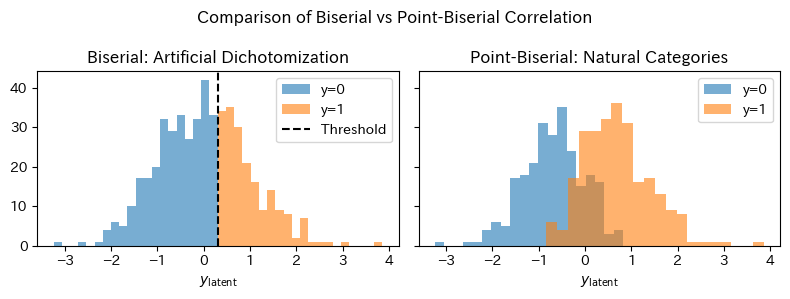

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(42)
n = 500
x = np.random.normal(loc=0, scale=1, size=n)
threshold = 0.3
y_biserial = (x > threshold).astype(int)
y_point = (x + np.random.normal(0, 0.5, n) > 0).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axs[0].hist(x[y_biserial == 0], bins=20, alpha=0.6, label="y=0")
axs[0].hist(x[y_biserial == 1], bins=20, alpha=0.6, label="y=1")
axs[0].axvline(threshold, color='k', linestyle='--', label='Threshold')
axs[0].set_title("Biserial: Artificial Dichotomization")
axs[0].set_xlabel(r"$y_{\text{latent}}$")
axs[0].legend()

axs[1].hist(x[y_point == 0], bins=20, alpha=0.6, label="y=0")
axs[1].hist(x[y_point == 1], bins=20, alpha=0.6, label="y=1")
axs[1].set_title("Point-Biserial: Natural Categories")
axs[1].set_xlabel(r"$y_{\text{latent}}$")
axs[1].legend()

plt.suptitle("Comparison of Biserial vs Point-Biserial Correlation")
plt.tight_layout()
plt.show()

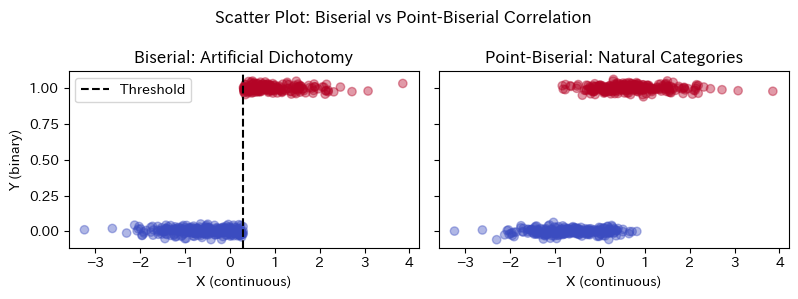

In [28]:
# Create scatter plots with color-coded categories for better intuition
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Biserial: artificial thresholding
axs[0].scatter(x, y_biserial + np.random.normal(0, 0.02, size=n), alpha=0.4, c=y_biserial, cmap='coolwarm')
axs[0].axvline(threshold, color='k', linestyle='--', label='Threshold')
axs[0].set_title("Biserial: Artificial Dichotomy")
axs[0].set_xlabel("X (continuous)")
axs[0].set_ylabel("Y (binary)")
axs[0].legend()

# Point-biserial: natural binary
axs[1].scatter(x, y_point + np.random.normal(0, 0.02, size=n), alpha=0.4, c=y_point, cmap='coolwarm')
axs[1].set_title("Point-Biserial: Natural Categories")
axs[1].set_xlabel("X (continuous)")

plt.suptitle("Scatter Plot: Biserial vs Point-Biserial Correlation")
plt.tight_layout()
plt.show()


#### Point-Biserialに補正係数をかけたのがBiserial

point-biserial

$$
r_{\text{pbi}}=\frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \sqrt{p q}
$$

に対して補正係数$\frac{\sqrt{pq}}{\phi(z)}$をかけたのがBiserial

$$
r_{\text{bi}} = r_{\text{pbi}} \cdot \frac{\sqrt{pq}}{\phi(z)} = \frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \frac{p q}{\phi(z)}
$$


:::{marginal}

なお、補正係数によってはbiserialは$[-1,1]$の範囲を超えた値になる（$| r_{\text{bi}} | > 1$になる）こともある（[Jacobs & Viechtbauer, 2017](https://pubmed.ncbi.nlm.nih.gov/27631635/)）

:::

In [40]:
rho = 0.5
cov = np.array([[1, rho], [rho, 1]])
X = multivariate_normal.rvs(cov=cov, size=100, random_state=0)
x = X[:, 0]
y = 1 * (X[:, 1] > 0.5)
print(f"biserial: {biserial_correlation(x, y):.5f}")
print(f"point_biserial: {point_biserial_correlation(x, y):.5f}")

biserial: 0.42521
point_biserial: 0.32762


In [41]:
from semopy.polycorr import polyserial_corr
polyserial_corr(x, y)

0.4575579360276353

### biserialとpoint-biserialはどれくらい差が出るのか

[MacCallum, R. C., Zhang, S., Preacher, K. J., & Rucker, D. D. (2002). On the practice of dichotomization of quantitative variables. Psychological methods, 7(1), 19.](https://pubmed.ncbi.nlm.nih.gov/11928888/)

